# Lab 3
## Introduction
In this lab we will analyse population dynamics under the logisitic model with managed harvesting.

First import the modules we need.

In [1]:
from plotly.figure_factory import create_quiver
from plotly import graph_objs as go
from numpy import meshgrid, arange, sqrt, linspace
from scipy.integrate import odeint

## Harvesting of fish
A population of fish in a lake, left to its own devices, is modelled by the logistic differential equation
\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}{t}} = 4y(1-y),
\end{align}
where the population $y$ is in units of thousands of fish and time $t$ is measured in years.

First define a function for $\mathrm{d}y/\mathrm{d}x$ in terms of $y$ and $x$.

In [2]:
def diff_eq(y, x):
    return 4 * y * (1 - y)

Next define a function that creates a Plotly Figure object that contains a slope field and, optionally, a few solutions to initial value problems.

It automates a few things we did in the last lab.

- `diff_eq` is the differential equation to be plotted
- `x` and `y` should be outputs from `meshgrid`. 
- `args` is any additional arguments to `diff_eq` (we will use that below).
- `initial_values` is a list (or array) of starting $y$ values from which approximate solutions will start. The corresponding $x$ value is the minimum element of `x`.

Note that the numerical solutions will plotted for the whole range of $x$ values in `x`, so if they blow up you will probably get a warning and less-than-useful plot.

In [3]:
def create_slope_field(diff_eq, x, y, args=(), initial_values=()):    
    S = diff_eq(y, x, *args)
    L = sqrt(1 + S**2)
    scale = 0.9*min(x[0][1]-x[0][0], y[1][0]-y[0][0])  # assume a regular grid
    fig = create_quiver(x, y, 1/L, S/L, scale=scale, arrow_scale=1e-16)
    fig.layout.update(yaxis=dict(scaleanchor='x',
                                 scaleratio=1,
                                 range=[y.min()-scale, y.max()+scale]),
                      xaxis=dict(range=[x.min()-scale, x.max()+scale]),
                      showlegend=False, width=500,
                      height=0.8*(y.max()-y.min())/(x.max()-x.min())*500)
    x = linspace(x.min(), x.max())
    for y0 in initial_values:
        y = odeint(diff_eq, y0, x, args).flatten()
        fig.add_trace(go.Scatter(x=x, y=y))
    return fig

The slope field below should hopefully give you some idea for the fish population dynamics.

Note that we use `arange` rather than `linspace` this week so that we can carefully control the increments between our grid points. `arange(0, 1.1, 0.25)` returns an array that starts with 0 and increments by 0.25 until it exceeds 1.1.

The plot also contains the solution curves for 
$y(0) = 1$ and $y(0) = 0.4$. Edit the cell to also include the solution curve for $y(0)=1.4$.

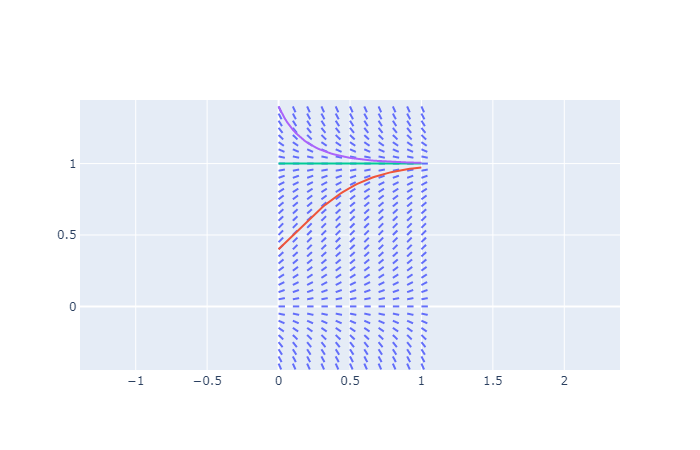

In [16]:
x, y = meshgrid(arange(0, 1.1, 0.1), arange(-0.4, 1.41, 0.05))
fig = create_slope_field(diff_eq, x, y, initial_values=(0.4, 1, 1.4))
fig.show('png')

### Equilibrium solutions
Looking back to our differential equation, $\mathrm{d}y/\mathrm{d}t = 0$ when $y(t) = 0$ or $y(t) = 1$. Looking at the slope field, we see that the equilibrium solution $y(t) = 1$ is stable (this is the carrying capacity here, corresponding to 1000 fish), whereas the equilibrium solution $y(t) = 0$ is unstable. Any non-zero initial population will eventually stabilise at 1000 fish.

### What will happen if harvesting is now commenced at a steady rate?
For the simplest harvesting model, assume that $H$ units (thousands) of fish are taken
continuously (smoothly) over the year, rather than at one instant each year.
Note that the units of $H$ are the same as those of $\mathrm{d}y/\mathrm{d}t$, thousands of fish per year, so we simply subtract $H$ from the RHS of our existing equation to give the DE with harvesting as
\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}{t}} = 4y(1-y) - H.
\end{align}
Again, the (constant) equilibrium solutions are found by setting $\mathrm{d}y/\mathrm{d}t = 0$, giving from the quadratic formula (check this),
\begin{align}
y(t) = \frac{4\pm\sqrt{16-16H}}{8} = \frac{1\pm\sqrt{1-H}}{2}.
\end{align}
What happens after harvesting starts will depend on the equilibrium solutions, their
stability and the initial number of fish $y(0)$.

Start by redefining `diff_eq` to include the `H` parameter. Note that defining `diff_eq` again overides our original definition.

In [47]:
def diff_eq(y, x, H=0):
    return 4 * y * (1 - y) - H

Now set $H = 0.6$ and plot the slope field. This is done by setting `args=(0.6,)` when we call `create_slope_field`. This is exactly how you would pass additional arguments like this one to `odeint` if you were calling it directly.

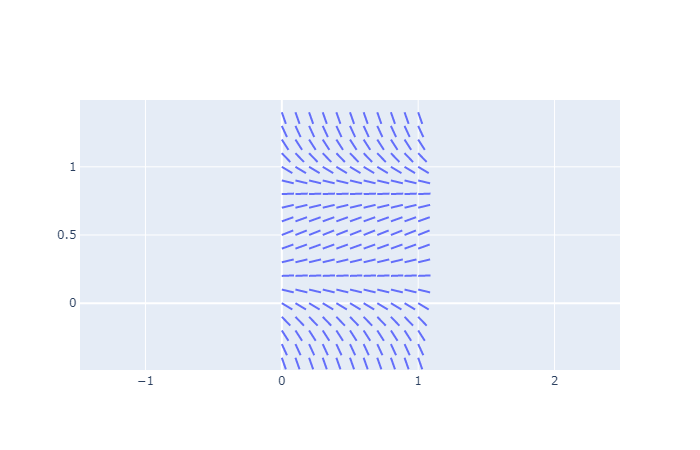

In [48]:
x, y = meshgrid(arange(0, 1.1, 0.1), arange(-0.4, 1.41, 0.1))
fig = create_slope_field(diff_eq, x, y, args=(0.6,))
fig.show('png')

From the solutions to the quadratic equation above, the equilibrium solutions of the DE are found to be $y(t) \approx 0.184$ and $y(t) \approx 0.816$. The previous equilibrium solution with no harvesting at $y(t) = 0$ has moved up to $y(t) \approx 0.184$, while the previous equilibrium solution with no harvesting at $y(t) = 1$ has moved down to $y(t) \approx 0.816$.

From the slope field, we see that the equilibrium solution $y(t) \approx 0.184$ is unstable, whereas the equilibrium solution $y(t) \approx 0.816$ is stable. If the population ever falls below about 0.184, or 184 fish, it will then drop to 0. This is a new feature, introduced by harvesting.

In the cell below, use `create_slope_field` to experiment by plotting the solutions to the initial value problems $y(0)=0.183$ and $y(0)=0.25$. Extend the $x$ range of your slope field until the top line is close to equlibrium. Note that if you extend it too far you will break `odeint` (why?). You may also like to increase the increments in `arange` to make the plot clearer.

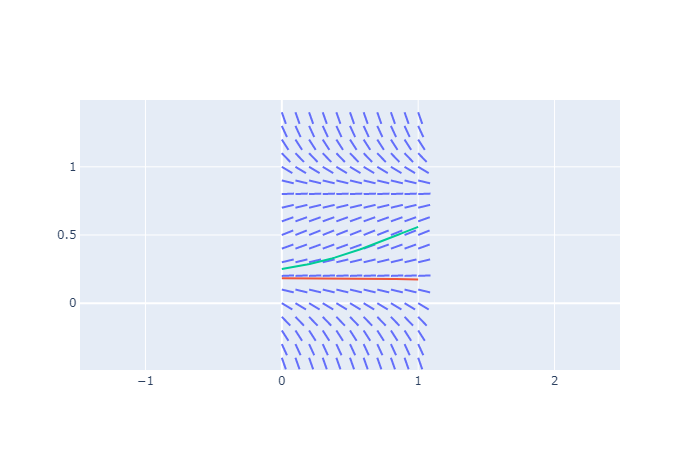

In [29]:
x, y = meshgrid(arange(0, 1.1, 0.1), arange(-0.4, 1.41, 0.1))
fig = create_slope_field(diff_eq, x, y, args=(0.6,), initial_values=(0.183, 0.25))
fig.show('png')

## Exercises

In this lab you will experiment with the population dynamics given by the logistic equation with harvesting that we started analysing in the lab.

This week the questions will be a combination of plots and written answers.

1. Assume that the harvest is 600 fish per year. **On the same figure,**  
  a. plot the slope field,  
  b. plot the equilibrium solutions that we found in above, and  
  c. plot the solution curves for $y(0)=1$, $y(0)=0.3$, and $y(0)=0.15$.

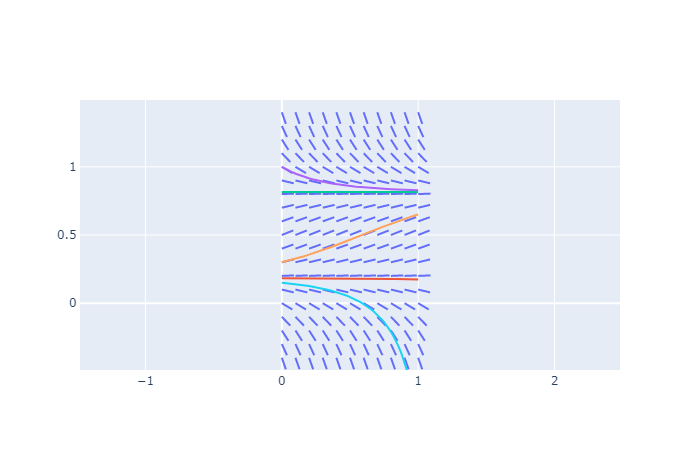

In [49]:
x, y = meshgrid(arange(0, 1.1, 0.1), arange(-0.4, 1.41, 0.1))
fig = create_slope_field(diff_eq, x, y, args=(0.6,), initial_values=(0.183, 0.816, 1, 0.3, 0.15))
fig.show('png')

1.  d. In the cell below, describe the behaviour of the fish population for each of these five initial numbers of fish.

At the equilibrium points the fish population will stagnate and remain constant. At the starting point of 1 it will decline towards 0.816 and at 0.3 it will increase towards it. For 0.15 it will continue to decline until there are no fish left.

2. a. i. Assume that $H=0.8$. Plot the slope field and five solutions, one for each equilibrium solution and one for each region between, above, or below them. You can use the equation from the lab to calculate the equilibrium solutions.

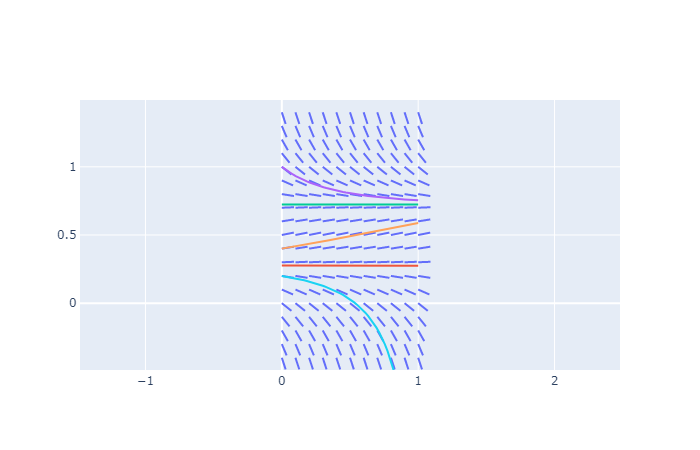

In [55]:
x, y = meshgrid(arange(0, 1.1, 0.1), arange(-0.4, 1.41, 0.1))
fig = create_slope_field(diff_eq, x, y, args=(0.8,), initial_values=(0.276, 0.724, 1, 0.4, 0.2))
fig.show('png')

2. a. ii. In the cell below, describe the limiting behaviour of each line.

At the equilibrium points the fish population will stagnate and remain constant. At the starting point of 1 it will decline towards 0.724 and at 0.1 it will increase towards it. For 0.2 it will continue to decline until there are no fish left.

2. b. i. Assume that $H=1$. Plot the slope field and three solutions for the equilibrium solution and the regions above and below it.

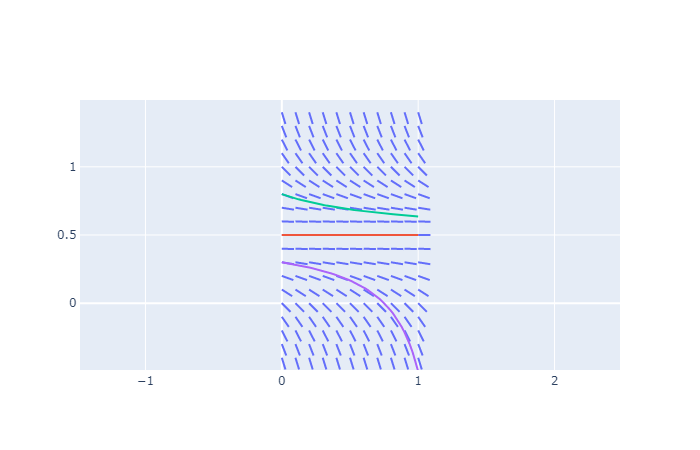

In [61]:
x, y = meshgrid(arange(0, 1.1, 0.1), arange(-0.4, 1.41, 0.1))
fig = create_slope_field(diff_eq, x, y, args=(1,), initial_values=(0.5, 0.8, 0.3))
fig.show('png')

2. b. ii. Describe the limiting behaviour of each line.

all values trend towards 0.5.

2. c. i. Assume that  𝐻=1.2. Plot the slope field and two or three solutions.

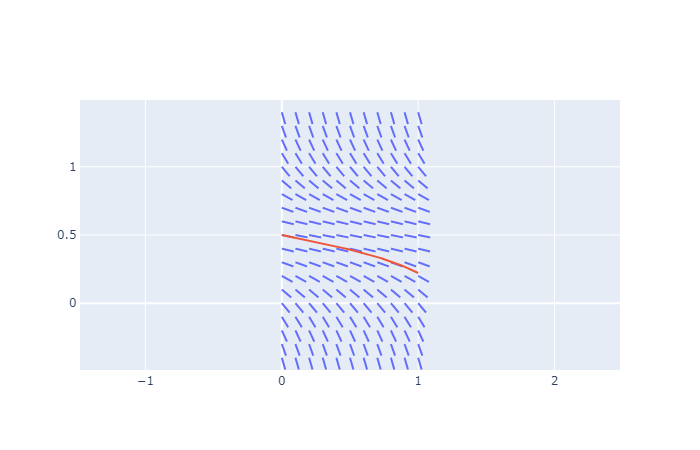

In [64]:
x, y = meshgrid(arange(0, 1.1, 0.1), arange(-0.4, 1.41, 0.1))
fig = create_slope_field(diff_eq, x, y, args=(1.2,), initial_values=(0.5,))
fig.show('png')

2. c. iii. Describe the limiting behaviour of the lines.

regardless of input fish population tends towards extinction

3. Summarize what happens to the equilibrium solutions and their stability as $H$
is increased from 0 to beyond 1. Refer to your plots to support your answers.

the stable soultion, or the stable population number decreases and the unstable number increases until 1 where there is a single semi-stable soultion.

4. What is a reasonable strategy for sustainable fishing in this case?
Don’t forget to allow qualitatively for minor catastrophes, such as disease or temporary overfishing.

dont allow for fishing above 1000 fish to keep the population at a stable rate, assuming it stated above 500 fish.